#Predicting heart disease using machine learning

###Problem Definition
In a statement,

Given clinical parameters about a patient, can we predict whether or not they have heart disease?

###Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

###Loading the data

In [ ]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


#Data Analysis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
data.target.value_counts()

1    526
0    499
Name: target, dtype: int64

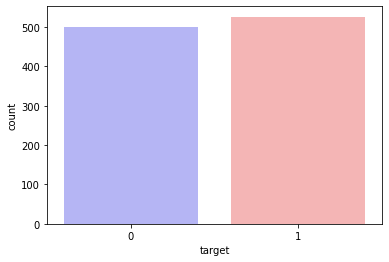

In [ ]:
sns.countplot(x="target", data=data, palette="bwr")
plt.show()

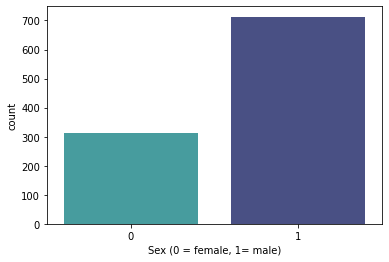

In [ ]:
sns.countplot(x='sex', data=data, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

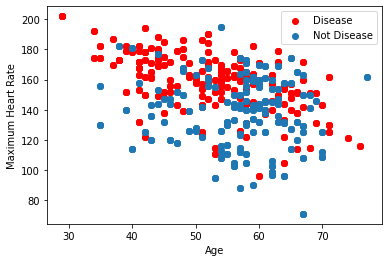

In [ ]:
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)], c="red")
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

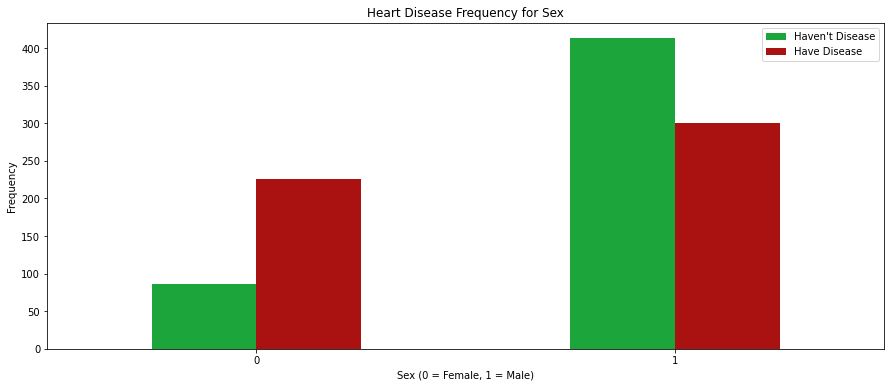

In [ ]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f64c07357f0>,
      dtype=object)

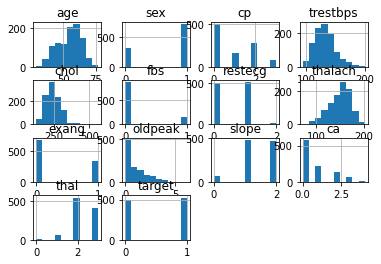

In [ ]:
data.hist()

##Correlation plot
Correlation analysis is a method of statistical evaluation used to study the strength of a relationship between two, numerically measured, continuous variables (e.g. height and weight)

In [ ]:
# store numeric variables in cnames
cnames=['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','num_major_vessels']

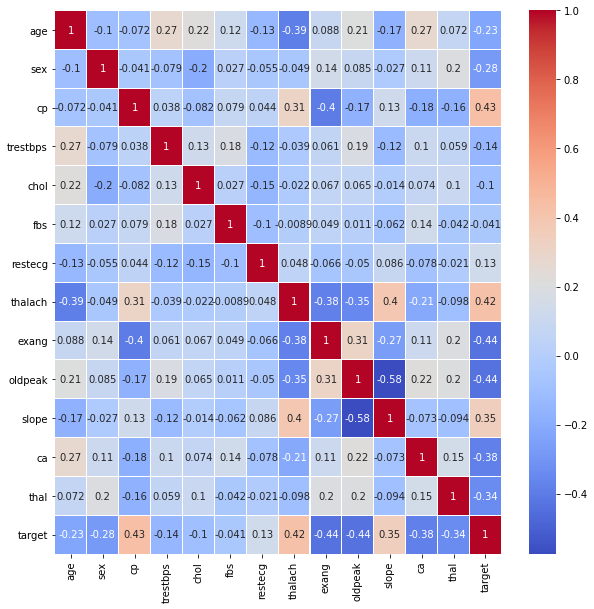

In [ ]:
#Set the width and height of the plot
f, ax = plt.subplots(figsize=(10, 10))

# #Correlation plot
# df_corr = data.loc[:,cnames]
#Generate correlation matrix
corr = data.corr()

#Plot using seaborn library
sns.heatmap(corr, annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

#Creating Dummy Variables

Since 'cp', 'thal' and 'slope' are categorical variables we'll turn them into dummy variables.

In [ ]:
data_copy =data
a = pd.get_dummies(data_copy['cp'], prefix = "cp")
b = pd.get_dummies(data_copy['thal'], prefix = "thal")
c = pd.get_dummies(data_copy['slope'], prefix = "slope")

In [ ]:
frames = [data_copy, a, b, c]
data_copy = pd.concat(frames, axis = 1)
data_copy.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,1,0,0,0,0,0,0,1,0,0,1
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,1,0,0,0,0,0,0,1,1,0,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,1,0,0,0,0,0,0,1,1,0,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,1,0,0,0,0,0,0,1,0,0,1
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,1,0,0,0,0,0,1,0,0,1,0


In [ ]:
data_copy = data_copy.drop(columns = ['cp', 'thal', 'slope'])
data_copy.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,0,1,0,0,0,0,0,0,1,0,0,1
1,53,1,140,203,1,0,155,1,3.1,0,0,1,0,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,1,125,1,2.6,0,0,1,0,0,0,0,0,0,1,1,0,0
3,61,1,148,203,0,1,161,0,0.0,1,0,1,0,0,0,0,0,0,1,0,0,1
4,62,0,138,294,1,1,106,0,1.9,3,0,1,0,0,0,0,0,1,0,0,1,0


#Creating Model

In [ ]:
x = data_copy.drop(['target'], axis = 1)
y = data_copy.target.values

In [ ]:
x

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,1,0,0,0,0,0,0,1,0,0,1
1,53,1,140,203,1,0,155,1,3.1,0,1,0,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,1,125,1,2.6,0,1,0,0,0,0,0,0,1,1,0,0
3,61,1,148,203,0,1,161,0,0.0,1,1,0,0,0,0,0,0,1,0,0,1
4,62,0,138,294,1,1,106,0,1.9,3,1,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,140,221,0,1,164,1,0.0,0,0,1,0,0,0,0,1,0,0,0,1
1021,60,1,125,258,0,0,141,1,2.8,1,1,0,0,0,0,0,0,1,0,1,0
1022,47,1,110,275,0,0,118,1,1.0,1,1,0,0,0,0,0,1,0,0,1,0
1023,50,0,110,254,0,0,159,0,0.0,0,1,0,0,0,0,0,1,0,0,0,1


In [ ]:
y

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
x_copy = x
scaler = StandardScaler()
x_copy= scaler.fit_transform(x_copy)

In [ ]:
print(x_copy)

[[-0.26843658  0.66150409 -0.37763552 ... -0.27894951 -0.94215771
   1.08880718]
 [-0.15815703  0.66150409  0.4791073  ...  3.58487815 -0.94215771
  -0.91843627]
 [ 1.71659547  0.66150409  0.76468824 ...  3.58487815 -0.94215771
  -0.91843627]
 ...
 [-0.81983438  0.66150409 -1.23437834 ... -0.27894951  1.06139343
  -0.91843627]
 [-0.4889957  -1.51170646 -1.23437834 ... -0.27894951 -0.94215771
   1.08880718]
 [-0.04787747  0.66150409 -0.66321646 ... -0.27894951  1.06139343
  -0.91843627]]


###Split train test data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_copy,y,test_size = 0.2,random_state=0)

In [ ]:
x_train.shape

(820, 21)

Naive Bayes is a statistical classification technique based on Bayes Theorem. It is one of the simplest supervised learning algorithms. Naive Bayes classifier is the fast, accurate and reliable algorithm. Naive Bayes classifiers have high accuracy and speed on large datasets.

Naive Bayes classifier assumes that the effect of a particular feature in a class is independent of other features. 

In [ ]:
nb = GaussianNB()
nb.fit(x_train, y_train)

y_pred_nb = nb.predict(x_test)

print(y_pred_nb)

[1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1
 0 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0
 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1
 0 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1]


In [ ]:
accuracy = accuracy_score(y_test, y_pred_nb)
print(accuracy)

0.8829268292682927


In [ ]:
score_train = nb.score(x_train, y_train)
print("Trining Score:",score_train)

score_test = nb.score(x_test,y_test)
print("Testing Score : " ,score_test)

Trining Score: 0.8329268292682926
Testing Score :  0.8829268292682927


In [ ]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        98
           1       0.87      0.91      0.89       107

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



In [ ]:
cm = confusion_matrix(y_test, y_pred_nb)
print(cm)

[[84 14]
 [10 97]]
